In [1]:
# Let's start importing the libraries we need for the project 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df2 = data.copy()
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df2.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# check for missing values
total = df2.isnull().sum().sort_values(ascending = False)
percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

# there is no missing values in the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Identify the values for ==> type
df2["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
# Identify the values for ==> type
df2["isFraud"].unique()

array([0, 1], dtype=int64)

In [8]:
# Identify the values for ==> nameDest
df2["nameDest"].unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'C1850423904',
       'C1881841831', 'C2080388513'], dtype=object)

In [9]:
# Identify the values for ==> nameOrig
df2["nameOrig"].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

## DATA CONTENT
- This dataset contain 6362620 rows and 11 columns. From which we are goign to keep only the features with numeric values and relevant for our analysis.
- Step ==> Is the our when the transaction was made, this is from 1 to 743, which represents 31 days cosidered for the data collection 24 hours each day.
- type ==> Is referinf to the type of transaction made: 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'
- Amount ==> The maoun of the Transaction
- nameOrig ==> Is refering to the origen of the transaction, is a unic alphanumeric code asigned to each transaction.
- nameDest ==> Is refering to the Destination of the transaction, is a unic alphanumeric code asigned to each transaction.
- oldbalanceOrg ==> Represents the balance of the sender before made the transaction.
- newbalanceOrig ==> Represents the balance of the sender after made the transaction.
- newbalanceDest ==> Represents the balance of the receiber after made the transaction.
- oldbalanceDest==> Represents the balance of the receiber before made the transaction.
- isFrau | isFlaggedFraud ==> Represent the same value.

### Comments 
- On the first stage we are goign to drop the column "isFlaggedFraud", because contains the same value as the column "isFraud", sine that is our target variable, it's important to avoid duplicate data.

In [10]:
# Droping the columns we don't need in our analysis 
df2 = df2.drop("isFlaggedFraud", axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [11]:
df2.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [12]:
df2.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

### Comments 
- If the first characters of nameOrig and nameDest are relevant, we will try to isolate them.

In [13]:
def returnFirstChar(name):
    return name[0]

df2['nameOrigF'] = df2['nameOrig'].apply(returnFirstChar)
df2['nameDestF'] = df2['nameDest'].apply(returnFirstChar)

In [14]:
# Droping the columns we don't need in our analysis 
df2 = df2.drop(columns=['nameOrig','nameDest','nameOrigF'])
# Let's update changes 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   nameDestF       object 
dtypes: float64(5), int64(2), object(2)
memory usage: 436.9+ MB


# LABEL ENCODER
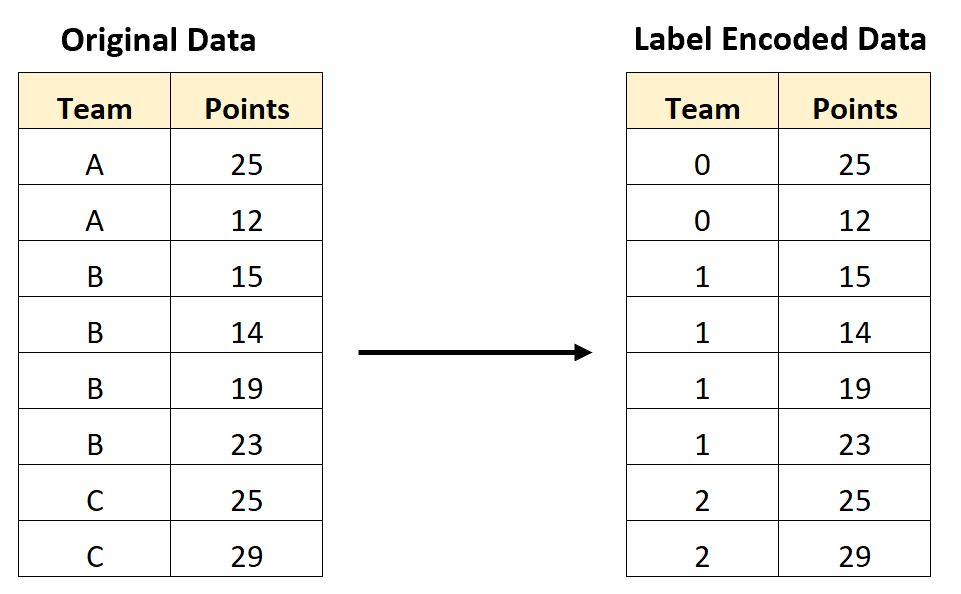

### Comments 
- Label encoding is useful for transforming categorical data into numerical format.

In [15]:
for column in ['type', 'nameDestF']:
    encoder = LabelEncoder()
    df2[column] = encoder.fit_transform(df2[column])

In [16]:
df2.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
nameDestF           int32
dtype: object

In [17]:
# let's convert all data to dtype == int64
df2 = df2.astype('int64')
df2.dtypes

step              int64
type              int64
amount            int64
oldbalanceOrg     int64
newbalanceOrig    int64
oldbalanceDest    int64
newbalanceDest    int64
isFraud           int64
nameDestF         int64
dtype: object

In [18]:
# Define constants
hours_in_day = 24

# Convert "step" values to days and hours
df2['days'] = (df2['step'] - 1) // hours_in_day + 1
df2['hours'] = (df2['step'] - 1) % hours_in_day

# Dropping the column transformed
df2 = df2.drop("step", axis=1)

# Now the 'days' column will contain the day of the month and the 'hours' column will contain the hour within that day,
print(df2[['days', 'hours']])

         days  hours
0           1      0
1           1      0
2           1      0
3           1      0
4           1      0
...       ...    ...
6362615    31     22
6362616    31     22
6362617    31     22
6362618    31     22
6362619    31     22

[6362620 rows x 2 columns]


In [19]:
df2.dtypes

type              int64
amount            int64
oldbalanceOrg     int64
newbalanceOrig    int64
oldbalanceDest    int64
newbalanceDest    int64
isFraud           int64
nameDestF         int64
days              int64
hours             int64
dtype: object

In [20]:
df2.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameDestF,days,hours
0,3,9839,170136,160296,0,0,0,1,1,0
1,3,1864,21249,19384,0,0,0,1,1,0
2,4,181,181,0,0,0,1,0,1,0
3,1,181,181,0,21182,0,1,0,1,0
4,3,11668,41554,29885,0,0,0,1,1,0


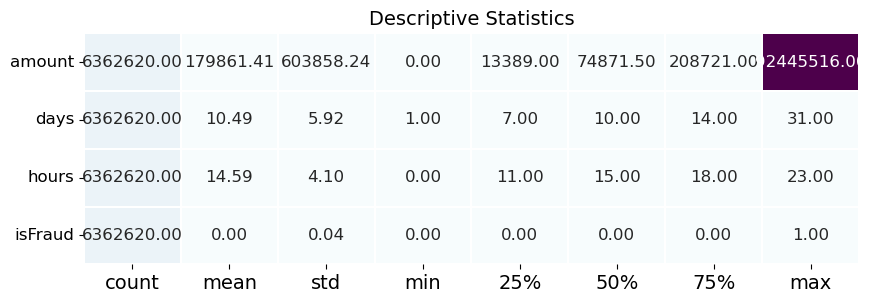

In [21]:
# statistical summary:
cols = df2[["amount","days","hours","isFraud"]]
cmap1 = 'BuPu'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

In [22]:
# correlation matrix
corr = df2.corr()
corr.style.background_gradient(cmap='BuPu')

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,nameDestF,days,hours
type,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.680754,0.005738,0.031429
amount,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,-0.197444,0.023473,-0.036982
oldbalanceOrg,-0.339760,-0.002762,1.000000,0.998803,0.066242,0.042029,0.010154,-0.189486,-0.009940,-0.004628
newbalanceOrig,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,-0.193915,-0.010181,-0.004610
oldbalanceDest,-0.104679,0.294137,0.066242,0.067812,1.000000,0.976569,-0.005885,-0.231455,0.027878,-0.005966
newbalanceDest,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.238315,0.026274,-0.012058
isFraud,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,-0.025697,0.032425,-0.027781
nameDestF,0.680754,-0.197444,-0.189486,-0.193915,-0.231455,-0.238315,-0.025697,1.000000,0.003678,0.043505
days,0.005738,0.023473,-0.009940,-0.010181,0.027878,0.026274,0.032425,0.003678,1.000000,0.036459
hours,0.031429,-0.036982,-0.004628,-0.004610,-0.005966,-0.012058,-0.027781,0.043505,0.036459,1.000000


### Comments 
- Based on the correlation matrix the column hour represents a negative correlation, however in the previous analysis we could identify that hour, is a relevant feature for credit card fraud detenction, for this reason we are not goign to drop columns untill we have a better insight of the analysis. 

## DATA VISUALISATION

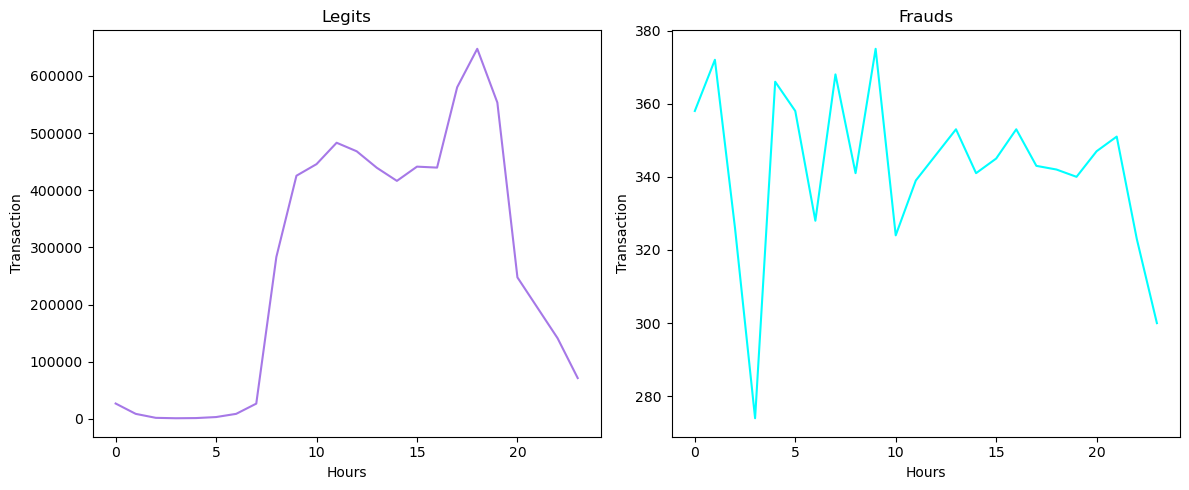

In [23]:
# Transaction count with non frauds over time (Hour)
count_0 = df2[df2['isFraud'] == 0].groupby('hours').count()["isFraud"]

# Transaction count with frauds over time (Hour)
count_1 = df2[df2['isFraud'] == 1].groupby('hours').count()["isFraud"]

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Legits
ax1.plot(count_0.index, count_0.values, color="#A678E7")
ax1.set_title("Legits")
ax1.set_xlabel("Hours")
ax1.set_ylabel("Transaction")

# Plot for Frauds
ax2.plot(count_1.index, count_1.values, color="#00FFFF")
ax2.set_title("Frauds")
ax2.set_xlabel("Hours")
ax2.set_ylabel("Transaction")

plt.tight_layout()
plt.show()

### Comments
- As it presented previously in the correlation matrix, the plot shows similiarity, which means that hour is not really related with fraudalent transactions, could be for many reasons, and one them might be that it's a transformed feature, so we don't have the 100% of confidence that those transactions we exactly at that time.

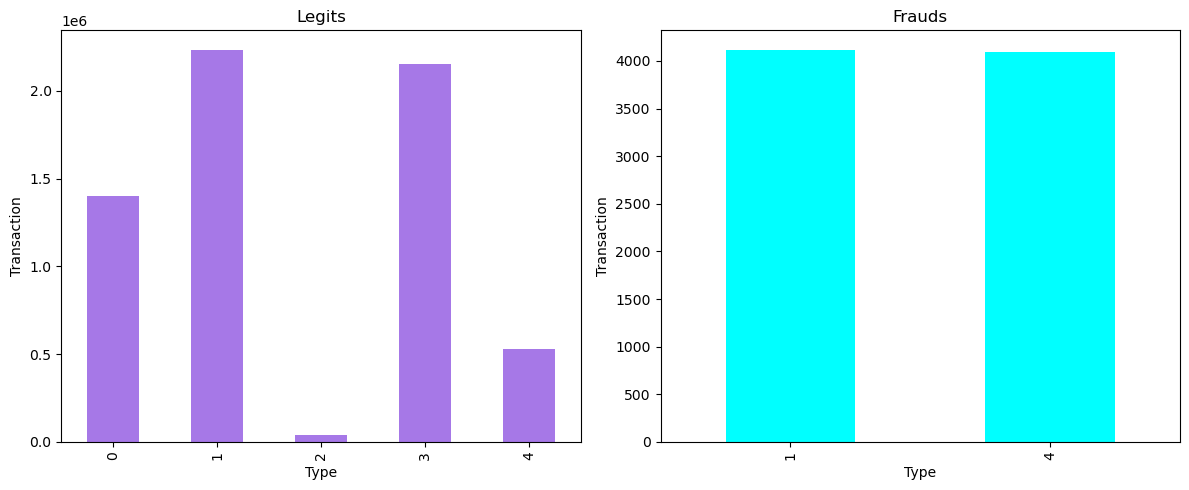

In [24]:
# Transaction count with non frauds over time (Hour)
count_0 = df2[df2['isFraud'] == 0].groupby('type').count()["isFraud"]

# Transaction count with frauds over time (Hour)
count_1 = df2[df2['isFraud'] == 1].groupby('type').count()["isFraud"]

# Create two separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Legits
count_0.plot(kind='bar', ax=ax1, color="#A678E7")
ax1.set_title("Legits")
ax1.set_xlabel("Type")
ax1.set_ylabel("Transaction")

# Plot for Frauds
count_1.plot(kind='bar', ax=ax2, color="#00FFFF")
ax2.set_title("Frauds")
ax2.set_xlabel("Type")
ax2.set_ylabel("Transaction")

plt.tight_layout()
plt.show()

- How much of the data are cases of fraud?

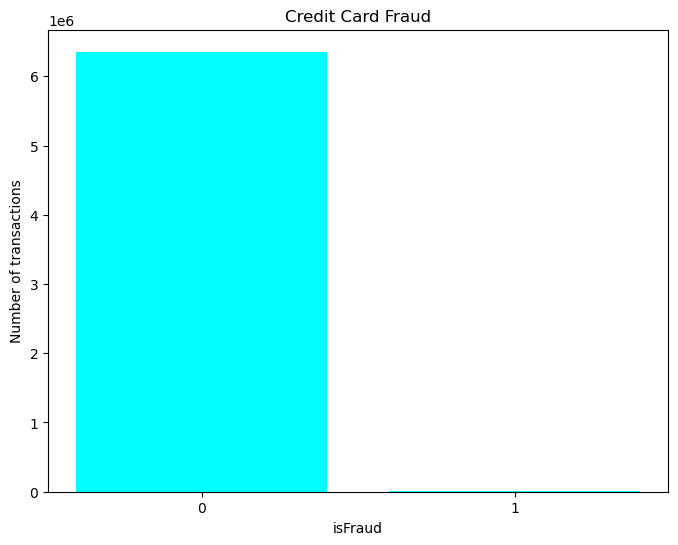

In [25]:
# Calculate class distribution
temp = df2["isFraud"].value_counts()
df_p = pd.DataFrame({'isFraud': temp.index, 'values': temp.values})

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(df_p['isFraud'], df_p['values'], color="#00FFFF")
plt.title('Credit Card Fraud')
plt.xlabel('isFraud')
plt.ylabel('Number of transactions')
plt.xticks(df_p['isFraud'])
plt.show()

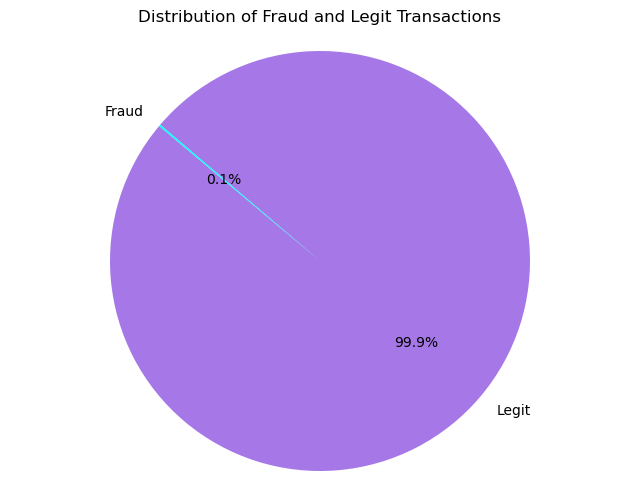

In [26]:
# Calculate the distribution of fraud and legit transactions
fraud_count = len(df2[df2['isFraud'] == 1])
legit_count = len(df2[df2['isFraud'] == 0])
counts = [legit_count, fraud_count]
labels = ['Legit', 'Fraud']
colors = ['#A678E7', '#00FFFF']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fraud and Legit Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [27]:
features = df2.drop('isFraud', axis=1)
labels = df2['isFraud']

In [28]:
Counter(df2['isFraud'])

Counter({0: 6354407, 1: 8213})

In [29]:
"Minority class imbalance: ", 8213 / 6354407

('Minority class imbalance: ', 0.0012924888191769902)

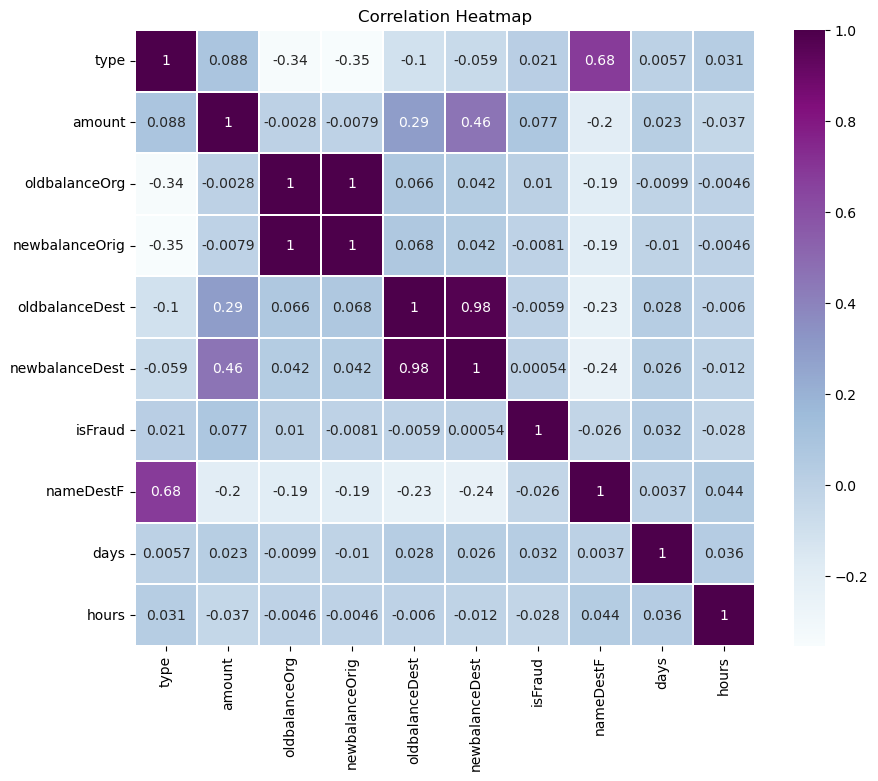

In [30]:
# correlation heatmap:
corr = df2.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap="BuPu", annot=True)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Correlation between features')

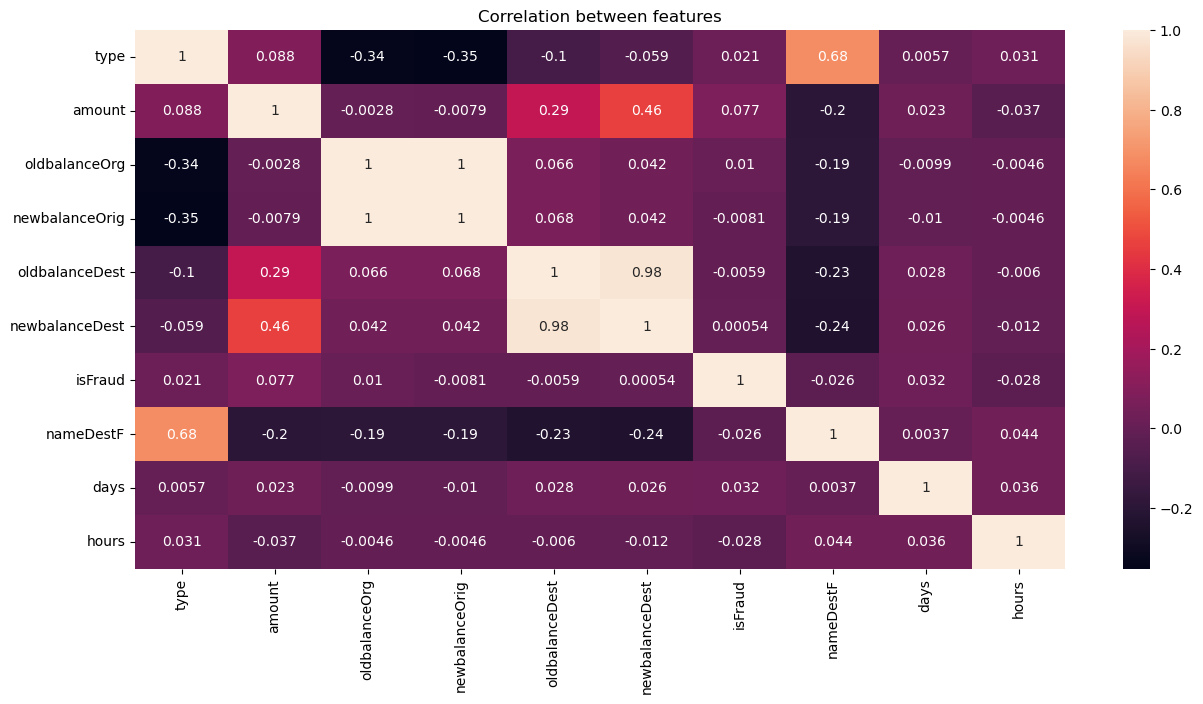

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(), annot=True)
plt.title("Correlation between features")

# SMOTE to handle class imbalance
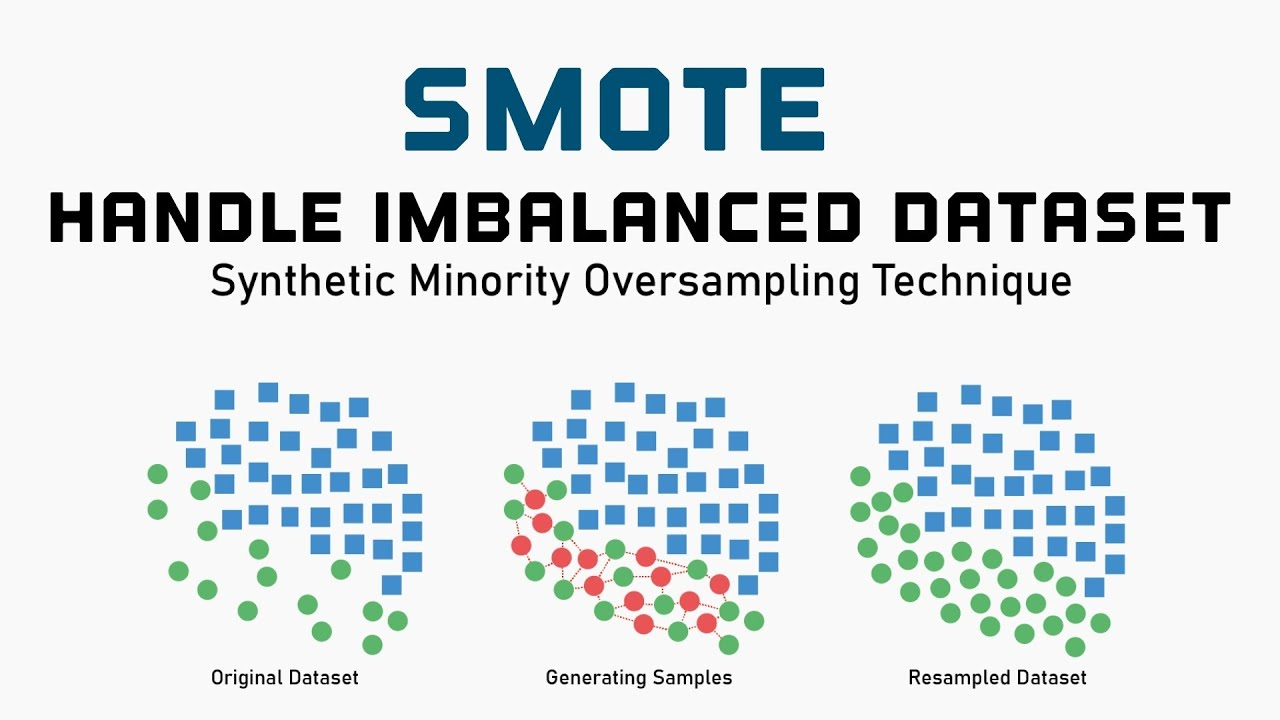

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=0)

print("Number samples X_train dataset: ", X_train.shape)
print("Number samples y_train dataset: ", y_train.shape)
print("Number samples X_test dataset: ", X_test.shape)
print("Number samples y_test dataset: ", y_test.shape)

Number samples X_train dataset:  (4453834, 9)
Number samples y_train dataset:  (4453834,)
Number samples X_test dataset:  (1908786, 9)
Number samples y_test dataset:  (1908786,)


In [33]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=10)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 5794
Before OverSampling, counts of label '0': 4448040 

After OverSampling, the shape of train_X: (8896080, 9)
After OverSampling, the shape of train_y: (8896080,) 

After OverSampling, counts of label '1': 4448040
After OverSampling, counts of label '0': 4448040


Text(0.5, 1.0, 'Correlation between synthetically created samples')

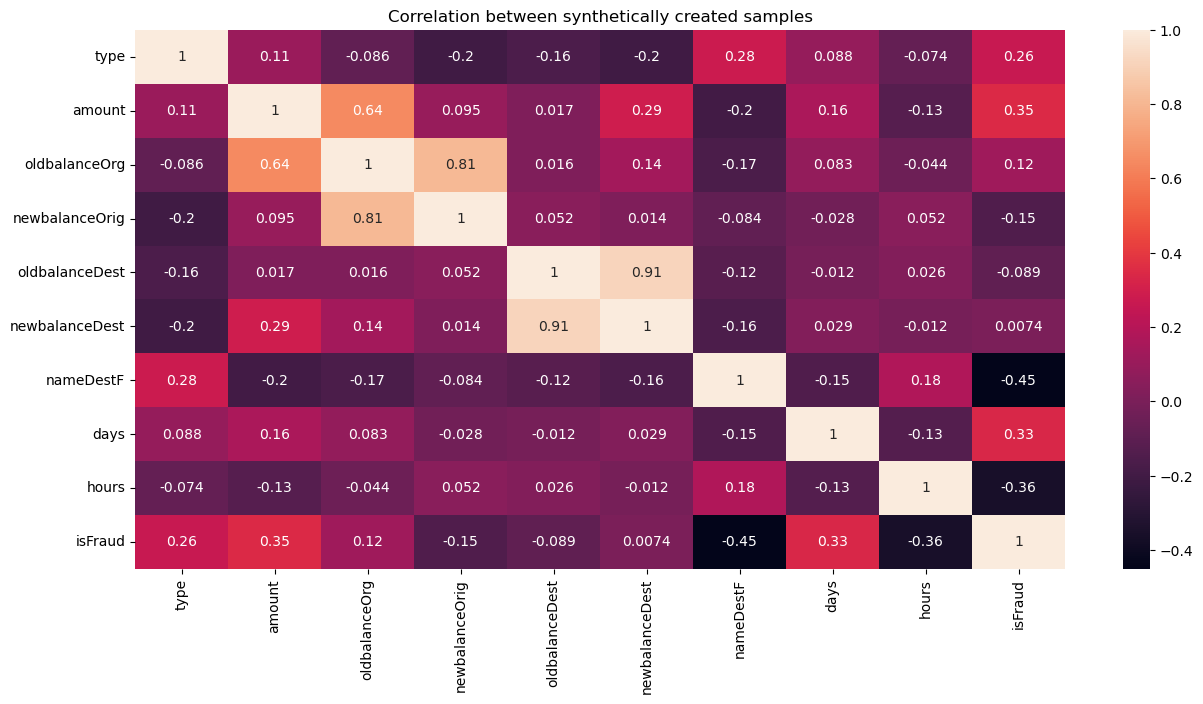

In [34]:
plt.figure(figsize=(15,7))
tdf = pd.DataFrame(X_train_res, columns=df2.drop('isFraud', axis = 1).columns)
tdf['isFraud'] = y_train_res
sns.heatmap(tdf.corr(), annot=True)
plt.title("Correlation between synthetically created samples")

### Comments
- We now have class balance for the minority class through the creation of artificial training samples, which are the following

## Model Creation

In [ ]:
clf = RandomForestClassifier()

parameters = {
    'n_estimators': [100, 500, 1000],
    'max_features': ['log2', 'sqrt', 'auto'],
    'max_depth': [10, 15]
}

acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, verbose=10, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_res[:100000], y_train_res[:100000])

In [35]:
 clf = RandomForestClassifier()

parameters = {'n_estimators': [100, 500, 1000], 
              'max_features': ['log2', 'sqrt','auto'],
              'max_depth': [10, 15]
             }

acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, verbose=10)
grid_obj = grid_obj.fit(X_train_res[:100000], y_train_res[:100000])

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START max_depth=10, max_features=log2, n_estimators=100..........
[CV 1/5; 1/18] END max_depth=10, max_features=log2, n_estimators=100;, score=0.999 total time=  19.4s
[CV 2/5; 1/18] START max_depth=10, max_features=log2, n_estimators=100..........
[CV 2/5; 1/18] END max_depth=10, max_features=log2, n_estimators=100;, score=1.000 total time=  19.0s
[CV 3/5; 1/18] START max_depth=10, max_features=log2, n_estimators=100..........
[CV 3/5; 1/18] END max_depth=10, max_features=log2, n_estimators=100;, score=1.000 total time=  19.8s
[CV 4/5; 1/18] START max_depth=10, max_features=log2, n_estimators=100..........
[CV 4/5; 1/18] END max_depth=10, max_features=log2, n_estimators=100;, score=1.000 total time=  11.2s
[CV 5/5; 1/18] START max_depth=10, max_features=log2, n_estimators=100..........
[CV 5/5; 1/18] END max_depth=10, max_features=log2, n_estimators=100;, score=1.000 total time=  19.8s
[CV 1/5; 2/18] START max

In [36]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train_res[:int(1e5)], y_train_res[:int(1e5)])

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=500)

In [37]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9995955544518872
